### Time-Series Forecast for The_Rise_of_AI Dataset

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [8]:
# 1. Load Cleaned Dataset
# =========================
df = pd.read_csv('../data/processed/cleaned_The_Rise_of_AI.csv')

In [9]:
# Focus on Year and Global AI Market Value
df = df[['Year', 'Global AI Market Value(in Billions)']]

In [10]:
# Convert Year to datetime if not already
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

In [11]:
# Rename columns for Prophet
df.rename(columns={'Year': 'ds', 'Global AI Market Value(in Billions)': 'y'}, inplace=True)

In [12]:
# 2. Train Prophet Model
# =========================
model = Prophet(yearly_seasonality=False, daily_seasonality=False)
model.fit(df)

20:18:35 - cmdstanpy - INFO - Chain [1] start processing
20:18:35 - cmdstanpy - INFO - Chain [1] done processing
20:18:35 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# 3. Forecast for Next 5 Years
# =========================
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

c:\Users\Sk Samdan\Desktop\ML_project\.venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


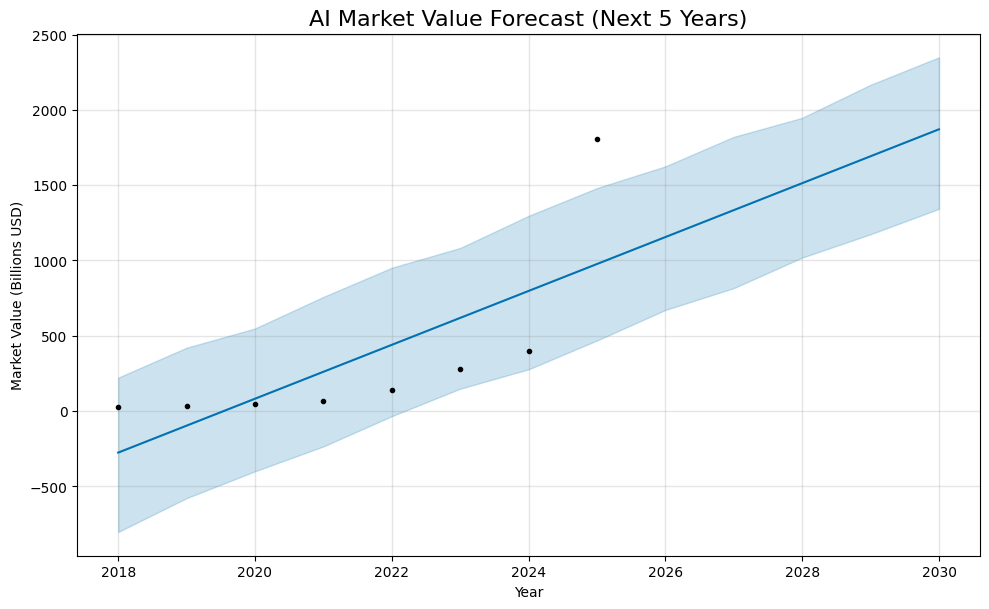

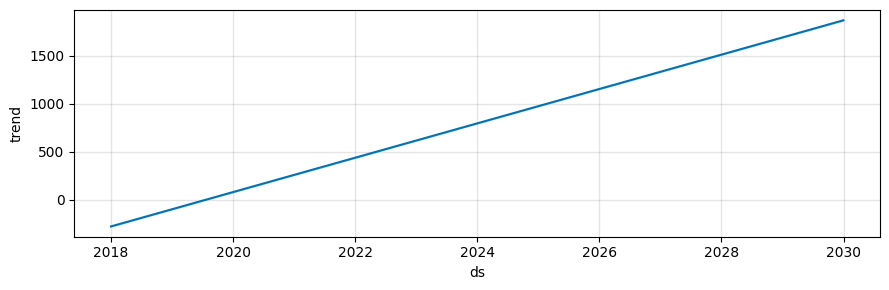

In [ ]:
# 4. Visualization
# =========================
import os

# Create plot directory if it doesn't exist
plot_dir = '../results/plot'
os.makedirs(plot_dir, exist_ok=True)

# forecast plot
fig1 = model.plot(forecast)
plt.title('AI Market Value Forecast (Next 5 Years)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Market Value (Billions USD)')
plt.savefig(os.path.join(plot_dir, 'ai_market_value_forecast.png'), dpi=300, bbox_inches='tight')
plt.show()

# Components plot
fig2 = model.plot_components(forecast)
plt.savefig(os.path.join(plot_dir, 'ai_market_value_components.png'), dpi=300, bbox_inches='tight')
plt.show()